<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Разбиваем-исходные-данные-на-признаки-и-целевой-признак" data-toc-modified-id="Разбиваем-исходные-данные-на-признаки-и-целевой-признак-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разбиваем исходные данные на признаки и целевой признак</a></span></li><li><span><a href="#Считаем-результат-r2-метрики-на-исходных-данных" data-toc-modified-id="Считаем-результат-r2-метрики-на-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Считаем результат r2-метрики на исходных данных</a></span></li><li><span><a href="#Создаём-матрицу-кодирования-$P$-размером-x-на-x,-где-x---количество-столбцов-в-матрице-признаков" data-toc-modified-id="Создаём-матрицу-кодирования-$P$-размером-x-на-x,-где-x---количество-столбцов-в-матрице-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создаём матрицу кодирования $P$ размером x на x, где x - количество столбцов в матрице признаков</a></span></li><li><span><a href="#Проверяем-сгенерированную-матрицу-на-обратимость" data-toc-modified-id="Проверяем-сгенерированную-матрицу-на-обратимость-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверяем сгенерированную матрицу на обратимость</a></span></li><li><span><a href="#Умножаем-матрицу-исходных-данных-на-матрицу-кодирования" data-toc-modified-id="Умножаем-матрицу-исходных-данных-на-матрицу-кодирования-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Умножаем матрицу исходных данных на матрицу кодирования</a></span></li><li><span><a href="#Проверяем-результат-r2-метрики" data-toc-modified-id="Проверяем-результат-r2-метрики-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Проверяем результат r2-метрики</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

В нашем распоряжении данные клиентов страховой компании «Хоть потоп», которые нам необходимо защитить. Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и объясним корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Загружаем данные в переменную

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.reaf_csv('D:\\insurance.csv')

Изучаем данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


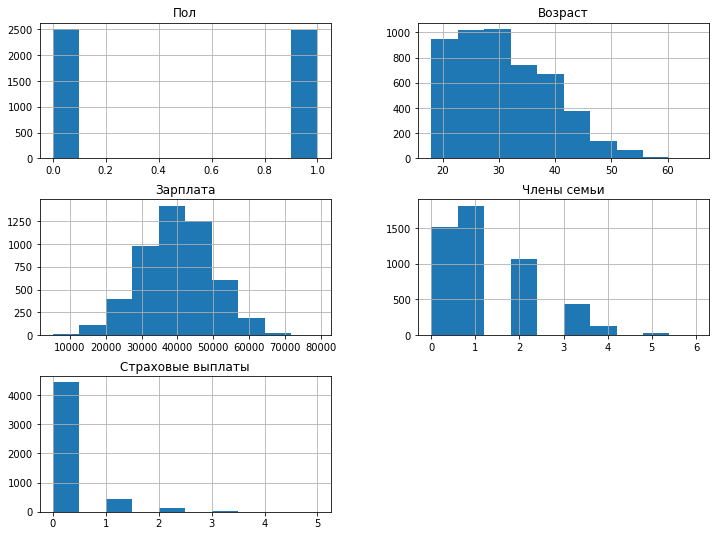

In [3]:
data.info()
data.hist(figsize=(12,9));
data.head(20)

Пропусков в данных нет, все признкаки имеют числовой тип и не мешают обучению. Сами признаки имеют близкое к нормальному или адекватное распределение, признак пола взят равновесно. Приступим к решению задачи

## Умножение матриц

Изменится ли после умножения матрицы признаков на обратимую матрицу качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** после умножения матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** $P$ - обратимая матрица, длина ребра которой - $n$ из $X(m,n)$. Если формула обучения для матрицы признаков $X$ (где нулевой столбец состоит из единиц) - это $w(X) = (X^T X)^{-1} X^T y$, то формула обучения для матрицы признаков $X$ (где нулевой столбец состоит из единиц), умноженной на матрицу $P$ - это $w(XP) = ((XP)^T (XP))^{-1} (XP)^T y$. Нам необходимо доказать равенство $a(X) = Xw(X) = XPw(XP) = a(XP)$. Если у нас это получится - это означает, что качество предсказаний линейной регресии не изменится, а если не получится, то такого вывода мы сделать не сможем.

Для решения нам необъодимо знать правила ассациативности $A (B C) = (A B) C$ и раскрытия скобок обратного и транспонированного произведения $(A B)^T = B^T A^T$, $(A B)^{-1} = B^{-1} A^{-1}$, то, что $A$ и $A^{-1}$ сокращаются, а так же то, что при умножении матриц мы не можем менять множители местами, т.к. в общем случае произведение матриц некоммутативно, то есть $A B ≠ B A$

Для начала раскроем скобки в формуле весов $w(XP) = ((XP)^T (XP))^{-1} (XP)^T y$

$((XP)^T (XP))^{-1}$ = $(P^T X^T (XP))^{-1}$ = $(P^T (X^T X) P)^{-1}$ = $P^{-1} (X^T X)^{-1} (P^T)^{-1}$

$(XP)^T = P^T X^T$

Подставим их в $w(XP)$:

$((XP)^T (XP))^{-1} (XP)^T y = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

В получившейся формуле третий и четвёртый множитель $(P^T)^{-1} P^T$ сокращаются, и у нас остаётся $P^{-1} (X^T X)^{-1} X^T y$. Если подставить эту формулу в формулу предсказания $a(XP) = X P w(X P)$, то у нас получится

$a(X P) = X P P^{-1} (X^T X)^{-1} X^T y$

Второй и третий множители сокращаются, и у нас остаётся

$a(X P) = X (X^T X)^{-1} X^T y$

Теперь подставим w(X) в формулу предсказаний $a(X) = Xw(X)$

$a(X) = X (X^T X)^{-1} X^T y$

Тождество $a(X) = Xw(X) = X (X^T X)^{-1} X^T y = XPw(XP) = a(XP)$ выполняется, значит после умножения матрицы признаков на обратимую матрицу качество линейной регрессии не изменится.

## Алгоритм преобразования

**Алгоритм**

1. разбиваем исходные данные на признаки и целевой признак
2. считаем результат r2-метрики на исходных данных
3. создаём матрицу кодирования размером x на x, где x - количество столбцов в матрице признаков
4. проверяем сгенерированную матрицу на обратимость
5. умножаем матрицу исходных данных на матрицу кодирования (чтобы строки первой умножались на столбцы второй)
6. проверяем результат r2-метрики - он должен быть идентичен результату из пункта 1

**Обоснование**

В предыдущем пункте мы алгебраически доказали, что результат после преобразования будет равен результату до. Теперь нам нужно создать квадратную кодирующую матрицу $P$, она должна быть обратимой и её длина и ширина должны быть равны количеству столбцов в матрице признаков (в нашем случае их будет 4) и умножить матрицу признаков на матрицу кодирования - в результате произведения матриц $X(m, n) P(n, n)$ у нас получится новая матрица признаков - по размеру она будет равна своей предшественнице, но все значения в ней будут отличаться в одинаковое количество раз.

## Проверка алгоритма

### Разбиваем исходные данные на признаки и целевой признак

In [4]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

### Считаем результат r2-метрики на исходных данных

In [5]:
model = LinearRegression()
model.fit(features, target)

LinearRegression()

In [6]:
result_before = r2_score(target, model.predict(features))
result_before

0.4249455028666801

### Создаём матрицу кодирования $P$ размером x на x, где x - количество столбцов в матрице признаков

In [7]:
P = np.random.randint(100, size=(features.shape[1], features.shape[1]))
P

array([[49, 18, 88, 54],
       [ 5, 89,  9, 51],
       [ 7, 51, 17, 76],
       [34, 53, 85, 42]])

### Проверяем сгенерированную матрицу на обратимость

Проверяем $P$ на обратимость

In [8]:
np.linalg.det(P)

-4709224.000000007

Определитель не равен нулю, поэтому матрица обратима

### Умножаем матрицу исходных данных на матрицу кодирования

In [9]:
features_new = pd.DataFrame(features.values @ P, columns=features.columns, index=features.index)
features_new

,Пол,Возраст,Зарплата,Члены семьи
0,347488.0,2533320.0,843742.0,3771787.0
1,266264.0,1942147.0,646499.0,2890388.0
2,147145.0,1073581.0,357261.0,1597479.0
3,292073.0,2128675.0,709259.0,3170355.0
4,182889.0,1333610.0,444040.0,1985082.0
...,...,...,...,...
4995,250108.0,1823298.0,607322.0,2714712.0
4996,367004.0,2675479.0,891191.0,3984176.0
4997,237468.0,1730786.0,576650.0,2577504.0
4998,229161.0,1669835.0,556441.0,2486502.0


Теперь дешифруем наши данные, чтобы убедиться, что они не пострадали

In [10]:
(features_new @ np.linalg.inv(P)).round(0)

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0
...,...,...,...,...
4995,-0.0,28.0,35700.0,2.0
4996,-0.0,34.0,52400.0,1.0
4997,-0.0,20.0,33900.0,2.0
4998,1.0,22.0,32700.0,3.0


### Проверяем результат r2-метрики

In [11]:
model.fit(features_new, target)

LinearRegression()

In [12]:
result_after = r2_score(target, model.predict(features_new))
print('Результат до преобразования:', result_before)
print('Результат после преобразования:', result_after)
print('Разница результатов до и после :', result_before-result_after)

Результат до преобразования: 0.4249455028666801
Результат после преобразования: 0.4249455028666781
Разница результатов до и после : 1.9984014443252818e-15


Разница между r2 метриками очень мала, значит алгоритм преобразования составлен верно.

## Общий вывод

Мы доказали, что умножение матрицы признаков на обратимую матрицу не влияет на результат предсказания линейной регресии, а затем составили алгоритм преобразования, в котором умножили матрицу признаков на обратимую матрицу $P$, чтобы зашифровать данные. После этого мы проверили алгоритм на данных страховой компании и убедились, что результаты практически идентичны.